# Работа проводилась на google colab. 

In [1]:
# проверяем наличие библиотеки
!pip install -U torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.2.2.post3)


In [2]:
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl


In [3]:
# проверка на работу cuda 

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [4]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


5.3.0


In [5]:
# устанавливаем апишку каггла для скачивания данных напрямую с соревнования
!pip install kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [6]:
# скачиваем данные соревнования
!kaggle competitions download -c simpsons3

  0% 0.00/584k [00:00<?, ?B/s]
100% 584k/584k [00:00<00:00, 79.3MB/s]
  0% 0.00/23.1k [00:00<?, ?B/s]
100% 23.1k/23.1k [00:00<00:00, 22.8MB/s]
 64% 7.00M/11.0M [00:00<00:00, 70.8MB/s]
100% 11.0M/11.0M [00:00<00:00, 69.8MB/s]
 98% 508M/517M [00:04<00:00, 53.5MB/s]
100% 517M/517M [00:04<00:00, 122MB/s] 


In [7]:
# распаковка zip файла
!unzip train.zip -d train
!unzip testset.zip -d test

Archive:  train.zip
   creating: train/simpsons_dataset/
   creating: train/simpsons_dataset/maggie_simpson/
  inflating: train/simpsons_dataset/maggie_simpson/pic_0028.jpg  
   creating: train/__MACOSX/
   creating: train/__MACOSX/simpsons_dataset/
   creating: train/__MACOSX/simpsons_dataset/maggie_simpson/
  inflating: train/__MACOSX/simpsons_dataset/maggie_simpson/._pic_0028.jpg  
  inflating: train/simpsons_dataset/maggie_simpson/pic_0000.jpg  
  inflating: train/__MACOSX/simpsons_dataset/maggie_simpson/._pic_0000.jpg  
  inflating: train/simpsons_dataset/maggie_simpson/pic_0014.jpg  
  inflating: train/__MACOSX/simpsons_dataset/maggie_simpson/._pic_0014.jpg  
  inflating: train/simpsons_dataset/maggie_simpson/pic_0015.jpg  
  inflating: train/__MACOSX/simpsons_dataset/maggie_simpson/._pic_0015.jpg  
  inflating: train/simpsons_dataset/maggie_simpson/pic_0001.jpg  
  inflating: train/__MACOSX/simpsons_dataset/maggie_simpson/._pic_0001.jpg  
  inflating: train/simpsons_dataset/magg

In [8]:
!nvidia-smi
import torch
torch.cuda.is_available()

Tue May 14 03:49:01 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    17W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

True

In [0]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [10]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 256
# работаем на видеокарте
DEVICE = torch.device("cuda")
DEVICE

device(type='cuda')

In [0]:
# измененный класс для сетки (изменено преобразование и убрана нормировка, поскольку ToPILImage не хотел есть float)
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        transformtrain = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        #x = np.array(x / 255, dtype='float32')
        x = np.array(x)
        if self.mode == 'train':
          x = transformtrain(x)
        else:
          x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [0]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [0]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('test/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [0]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [0]:
val_dataset = SimpsonsDataset(val_files, mode='val')
#val_dataset = SimpsonsDataset(val_files, mode='train') # проверял, что работают трансформации на трейне

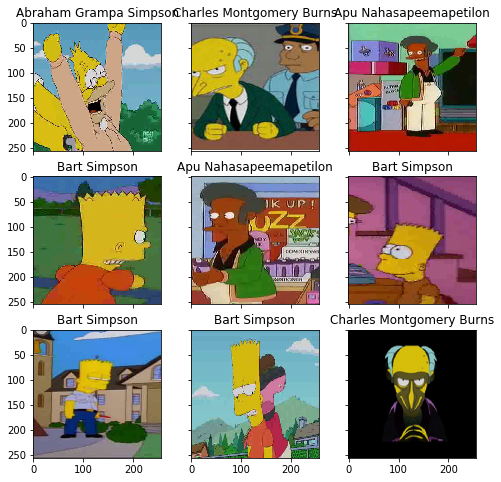

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), sharey=True, sharex=True)

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

In [0]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [0]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [0]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
      
        layers_to_unfreeze = 5
        
        opt = torch.optim.Adam(model.parameters()
                               , lr=0.0001, amsgrad=True)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            #print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [0]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

plt.ion()

In [22]:
# пробовал разные варианты предобученных сеток с заморозкой и без слоев
n_classes = len(np.unique(train_val_labels))
model = models.vgg13(pretrained=True)#vgg13(pretrained = True)#alexnet(pretrained=True)
layers_to_unfreeze = 5
#for param in model.features.parameters():
#  param.requires_grad = False
print("we will classify :{}".format(n_classes))
print(model)

Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /root/.cache/torch/checkpoints/vgg13-c768596a.pth
100%|██████████| 532194478/532194478 [00:13<00:00, 40118230.90it/s]


we will classify :42
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU(inpl

In [23]:
num_features = 25088#9216 25088

torch.manual_seed(0) # надеюсь этой штуки достаточно чтобы воспроизводимость была
model.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(num_features, 200),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(200, n_classes),
            nn.LogSoftmax()
        )

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU(inplace)
    (17): Conv2d

In [0]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [25]:
# обучаем модельку....3.5 часа...с отваливающимся коллабом...приятно...
model = model.to(DEVICE)

history = train(train_dataset, val_dataset, model=model, epochs=30, batch_size=64)

epoch:   0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
epoch:   3%|▎         | 1/30 [07:09<3:27:24, 429.12s/it]


Epoch 001 train_loss: 1.8888     val_loss 0.7391 train_acc 0.5125 val_acc 0.8149


epoch:   7%|▋         | 2/30 [14:17<3:20:07, 428.83s/it]


Epoch 002 train_loss: 0.4900     val_loss 0.3587 train_acc 0.8774 val_acc 0.9096


epoch:  10%|█         | 3/30 [21:24<3:12:42, 428.25s/it]


Epoch 003 train_loss: 0.2761     val_loss 0.3477 train_acc 0.9279 val_acc 0.9133


epoch:  13%|█▎        | 4/30 [28:30<3:05:18, 427.63s/it]


Epoch 004 train_loss: 0.1889     val_loss 0.3195 train_acc 0.9518 val_acc 0.9222


epoch:  17%|█▋        | 5/30 [35:39<2:58:19, 427.98s/it]


Epoch 005 train_loss: 0.1259     val_loss 0.2692 train_acc 0.9670 val_acc 0.9347


epoch:  20%|██        | 6/30 [42:45<2:50:58, 427.45s/it]


Epoch 006 train_loss: 0.0946     val_loss 0.2684 train_acc 0.9756 val_acc 0.9362


epoch:  23%|██▎       | 7/30 [49:50<2:43:34, 426.72s/it]


Epoch 007 train_loss: 0.0840     val_loss 0.2289 train_acc 0.9770 val_acc 0.9476


epoch:  27%|██▋       | 8/30 [56:57<2:36:31, 426.87s/it]


Epoch 008 train_loss: 0.0507     val_loss 0.2587 train_acc 0.9868 val_acc 0.9459


epoch:  30%|███       | 9/30 [1:04:03<2:29:15, 426.47s/it]


Epoch 009 train_loss: 0.0400     val_loss 0.2566 train_acc 0.9889 val_acc 0.9436


epoch:  33%|███▎      | 10/30 [1:11:09<2:22:11, 426.57s/it]


Epoch 010 train_loss: 0.0366     val_loss 0.2508 train_acc 0.9899 val_acc 0.9507


epoch:  37%|███▋      | 11/30 [1:18:16<2:15:03, 426.51s/it]


Epoch 011 train_loss: 0.0341     val_loss 0.2593 train_acc 0.9911 val_acc 0.9448


epoch:  40%|████      | 12/30 [1:25:22<2:07:54, 426.39s/it]


Epoch 012 train_loss: 0.0323     val_loss 0.3129 train_acc 0.9917 val_acc 0.9362


epoch:  43%|████▎     | 13/30 [1:32:30<2:00:56, 426.86s/it]


Epoch 013 train_loss: 0.0198     val_loss 0.2711 train_acc 0.9946 val_acc 0.9513


epoch:  47%|████▋     | 14/30 [1:39:37<1:53:49, 426.82s/it]


Epoch 014 train_loss: 0.0557     val_loss 0.2443 train_acc 0.9851 val_acc 0.9494


epoch:  50%|█████     | 15/30 [1:46:44<1:46:46, 427.08s/it]


Epoch 015 train_loss: 0.0193     val_loss 0.2417 train_acc 0.9951 val_acc 0.9551


epoch:  53%|█████▎    | 16/30 [1:53:51<1:39:38, 427.07s/it]


Epoch 016 train_loss: 0.0169     val_loss 0.2528 train_acc 0.9952 val_acc 0.9547


epoch:  57%|█████▋    | 17/30 [2:00:57<1:32:26, 426.62s/it]


Epoch 017 train_loss: 0.0088     val_loss 0.2349 train_acc 0.9982 val_acc 0.9576


epoch:  60%|██████    | 18/30 [2:08:05<1:25:24, 427.03s/it]


Epoch 018 train_loss: 0.0135     val_loss 0.2477 train_acc 0.9969 val_acc 0.9570


epoch:  63%|██████▎   | 19/30 [2:15:11<1:18:14, 426.77s/it]


Epoch 019 train_loss: 0.0092     val_loss 0.2630 train_acc 0.9980 val_acc 0.9551


epoch:  67%|██████▋   | 20/30 [2:22:17<1:11:05, 426.57s/it]


Epoch 020 train_loss: 0.0088     val_loss 0.2924 train_acc 0.9981 val_acc 0.9494


epoch:  70%|███████   | 21/30 [2:29:25<1:04:01, 426.86s/it]


Epoch 021 train_loss: 0.0060     val_loss 0.3066 train_acc 0.9980 val_acc 0.9476


epoch:  73%|███████▎  | 22/30 [2:36:30<56:52, 426.52s/it]


Epoch 022 train_loss: 0.0067     val_loss 0.2565 train_acc 0.9982 val_acc 0.9597


epoch:  77%|███████▋  | 23/30 [2:43:36<49:43, 426.26s/it]


Epoch 023 train_loss: 0.0090     val_loss 0.2524 train_acc 0.9976 val_acc 0.9534


epoch:  80%|████████  | 24/30 [2:50:41<42:35, 425.99s/it]


Epoch 024 train_loss: 0.0025     val_loss 0.2362 train_acc 0.9992 val_acc 0.9614


epoch:  83%|████████▎ | 25/30 [2:57:47<35:29, 425.93s/it]


Epoch 025 train_loss: 0.0009     val_loss 0.2656 train_acc 0.9997 val_acc 0.9606


epoch:  87%|████████▋ | 26/30 [3:04:54<28:24, 426.07s/it]


Epoch 026 train_loss: 0.0019     val_loss 0.2453 train_acc 0.9996 val_acc 0.9641


epoch:  90%|█████████ | 27/30 [3:11:58<21:16, 425.45s/it]


Epoch 027 train_loss: 0.0052     val_loss 0.2375 train_acc 0.9990 val_acc 0.9591


epoch:  93%|█████████▎| 28/30 [3:19:03<14:11, 425.52s/it]


Epoch 028 train_loss: 0.0004     val_loss 0.2397 train_acc 0.9999 val_acc 0.9658


epoch:  97%|█████████▋| 29/30 [3:26:09<07:05, 425.64s/it]


Epoch 029 train_loss: 0.0067     val_loss 0.2364 train_acc 0.9987 val_acc 0.9626


epoch: 100%|██████████| 30/30 [3:33:15<00:00, 425.60s/it]


Epoch 030 train_loss: 0.0019     val_loss 0.2336 train_acc 0.9996 val_acc 0.9624


In [0]:
loss, acc, val_loss, val_acc = zip(*history)

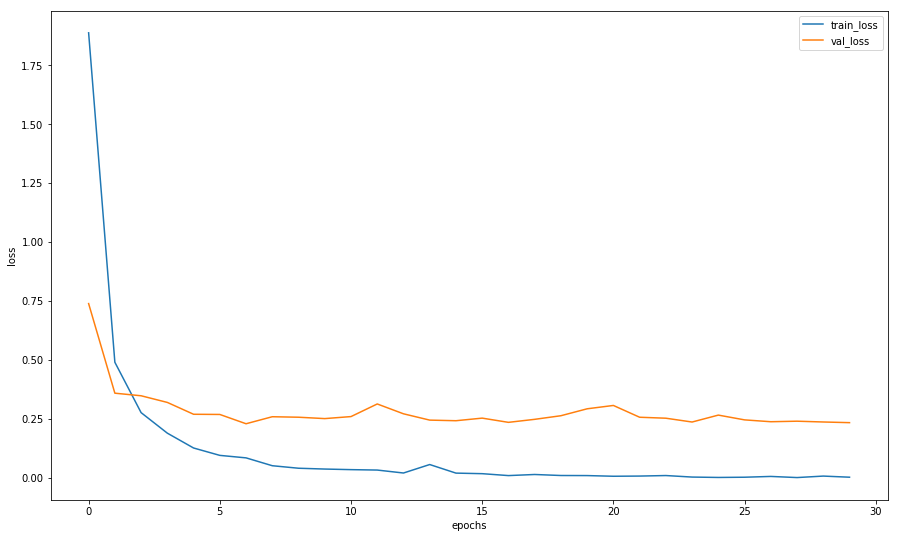

In [27]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [0]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [29]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(model, ex_img.unsqueeze(0))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [30]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(model, imgs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [0]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


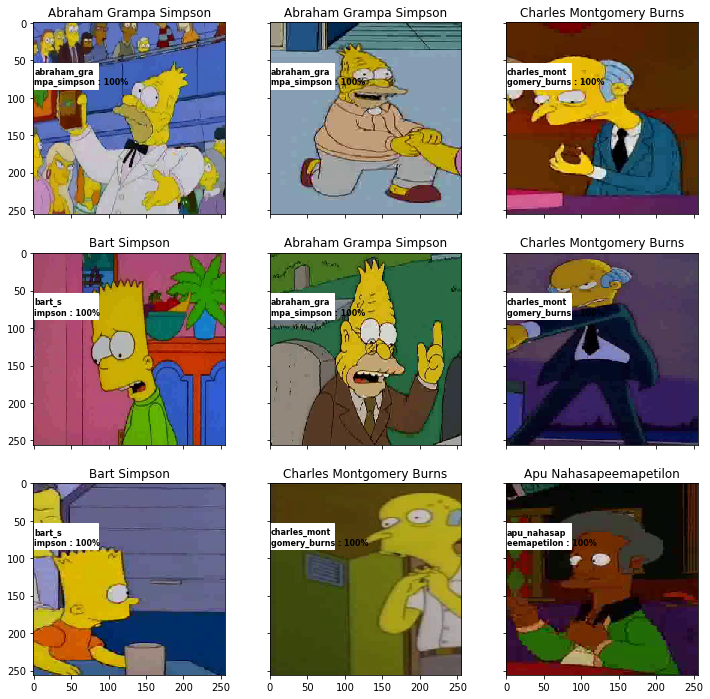

In [33]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(model, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

In [34]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(model, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [35]:
import pandas as pd
#my_submit = pd.read_csv("sample_submission.csv")
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head()

Id                Expected
0    img0.jpg            nelson_muntz
1    img1.jpg            bart_simpson
2   img10.jpg            ned_flanders
3  img100.jpg            chief_wiggum
4  img101.jpg  apu_nahasapeemapetilon

In [0]:
# создаем файлик в папке для текущей версии гиперпараметров
import os

namefile = 'tryAlex21'

try:
    os.stat("submits")
except:
    os.mkdir("submits")  
    
my_submit.to_csv('./submits/%s.csv'%(namefile), index=False)

In [0]:
# выгружаем из колаба созданный файлик...очень спасало, если оставить сетку считаться, пока идешь на обед ^^
from google.colab import files
files.download('./submits/%s.csv'%(namefile))